# Time Indexed Files `F-15 A`

In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

In [3]:
cd ~/Desktop/Tesis/F15A

/home/luis/Desktop/Tesis/F15A


In [4]:
ls

 15-9-f-15_nr_002_EOWR_combined.pdf
 CSVs/
'FWR MUD F-15_ABC_nr_004.pdf'
 trajectory/
 WL_RAW_BHPR-GR-MECH_TIME_MWD_1-3_INF_1.ASC
 WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS
 WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS
 WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS


In [5]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [6]:
files = os.listdir()
files = [s for s in files if ".LAS" in s]
files.sort()
files

['WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS']

In [7]:
dfs = []
for elements in files:
    df = sc.time_indexed_LAS(elements)
    dfs.append(df)

File: WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS 

Total rows :  46591
Columns:
 ['DEPT' 'ROP5' 'ARC_GR_UNC_RT' 'BPOS' 'BVEL' 'SWOB' 'TQA' 'RPM' 'CRPM_RT'
 'Stick_RT' 'TFLO' 'TRPM_RT' 'SPPA' 'SHKRSK_RT' 'SHKPK_RT' 'ECD_ARC'
 'APRS_ARC' 'ATMP' 'HKLD' 'DateTime']
Initial depth: 1003.0889
Initial date: 11-December-2008
DeltaTime: 0 days 00:00:10 


File: WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS 

Total rows :  31017
Columns:
 ['DEPT' 'ROP5' 'GRMA_BHC_RT' 'BPOS' 'BVEL' 'SWOB' 'HKLD' 'TQA' 'RPM'
 'Stick_RT' 'CRPM_RT' 'TFLO' 'TRPM_RT' 'SPPA' 'SHKRSK_RT' 'SHKPK_RT'
 'SHKL_DH_ECO_RT' 'ECD' 'DHAP' 'DHAT' 'DateTime']
Initial depth: 2539.0751
Initial date: 28-December-2008
DeltaTime: 0 days 00:00:10 


File: WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS 

Total rows :  27955
Columns:
 ['DEPT' 'ROP5' 'GRMA_BHC_RT' 'BPOS' 'BVEL' 'SWOB' 'HKLD' 'TQA' 'RPM'
 'Stick_RT' 'CRPM_RT' 'TFLO' 'TRPM_RT' 'SPPA' 'SHKRSK_RT' 'SHKPK_RT'
 'SHKL_DH_ECO_RT' 'ECD' 'DHAP' 'DHAT' 'DateTime']
Initial depth: 620.4293
Initial date: 01-January-200

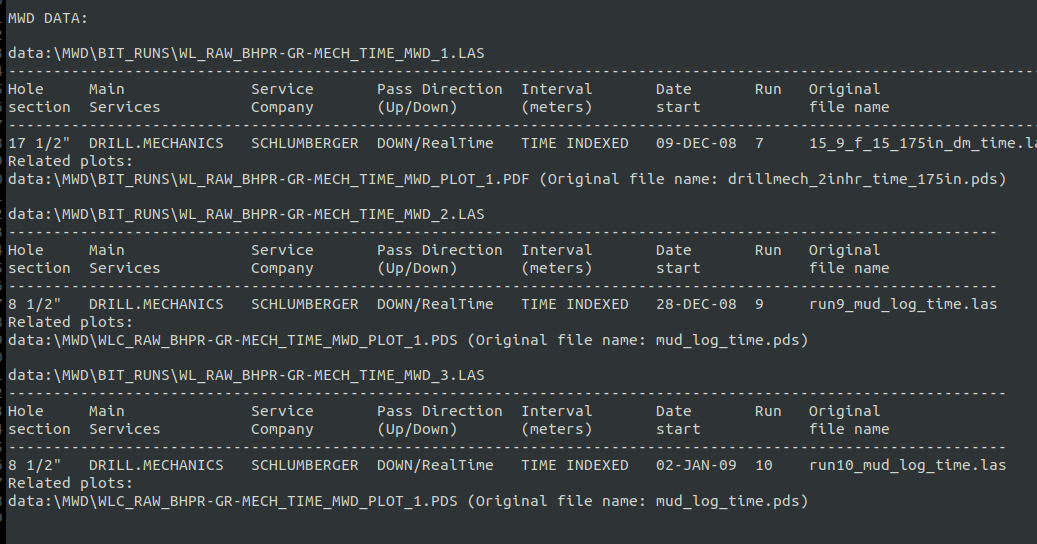

In [8]:
run_7 = dfs[0]
run_9 = dfs[1]
run_10 = dfs[2]

In [9]:
runs = [run_7,run_9,run_10]
runs_txt = ["run_7","run_9","run_10"]
sections  =  ['17 1/2"','8 1/2"','8 1/2"']
info = list(zip(runs_txt,sections))

In [10]:
list(zip(files,info))

[('WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS', ('run_7', '17 1/2"')),
 ('WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS', ('run_9', '8 1/2"')),
 ('WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS', ('run_10', '8 1/2"'))]

## Drilling events 

Plot: run_7 	Section: 17 1/2"


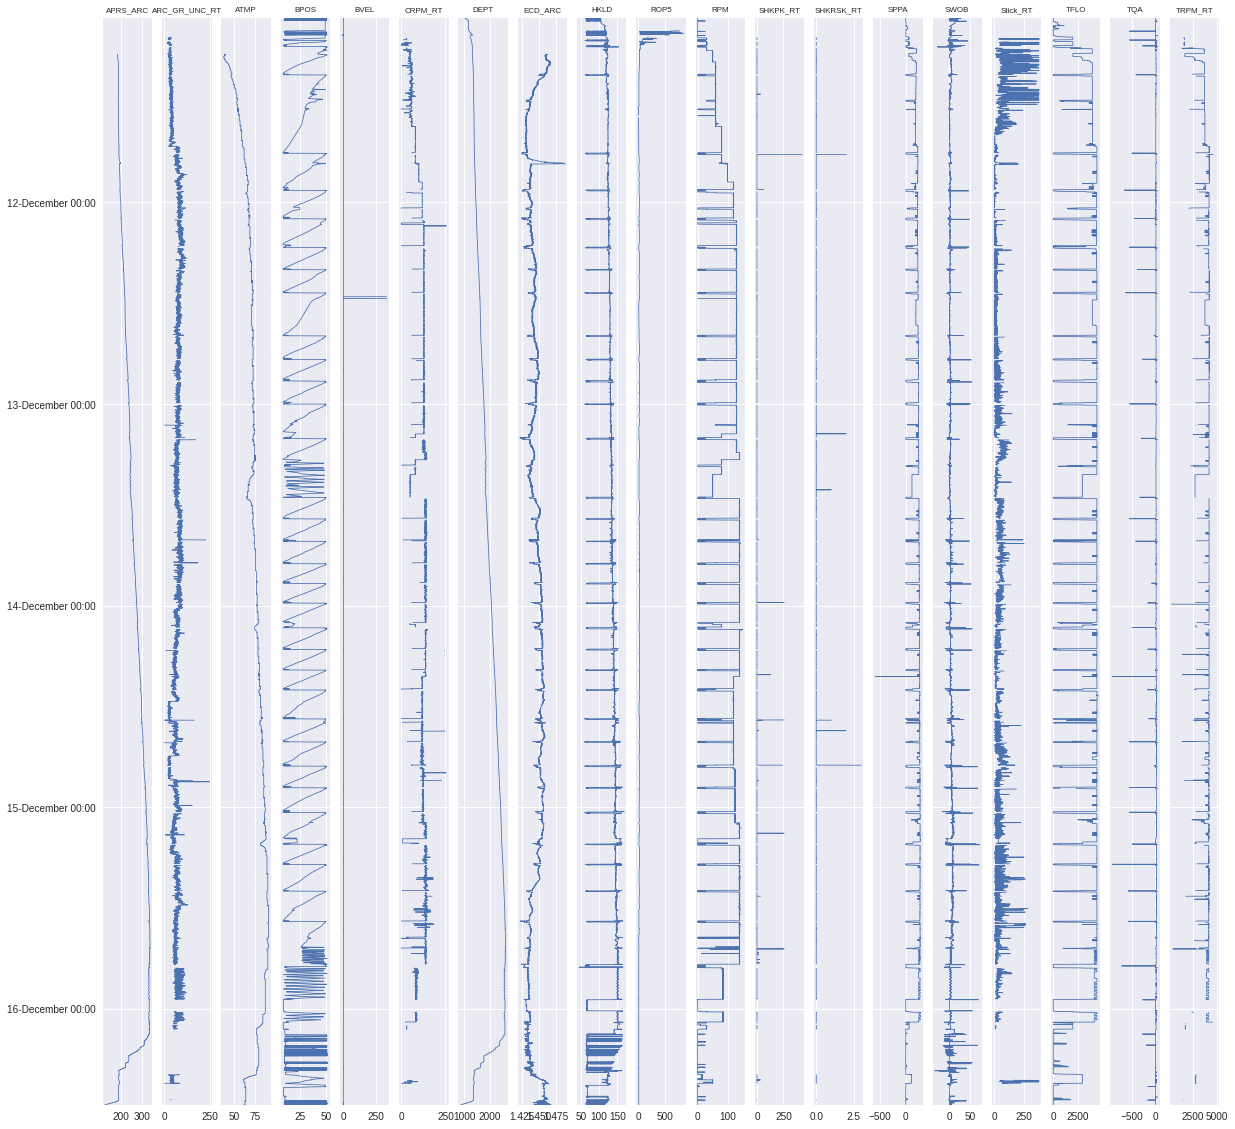




Plot: run_9 	Section: 8 1/2"


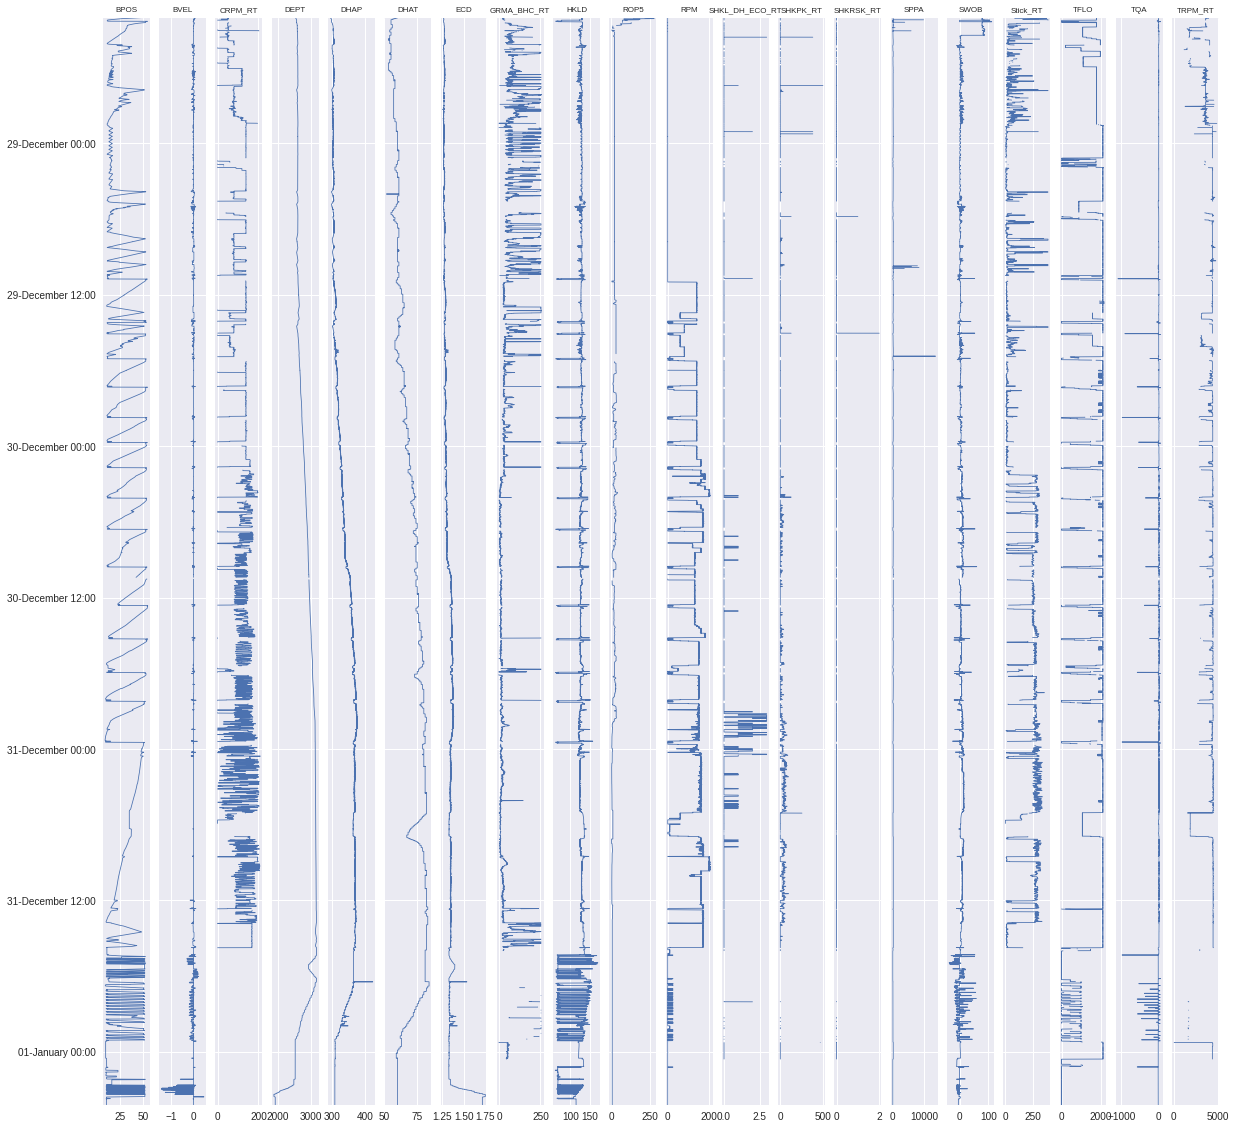




Plot: run_10 	Section: 8 1/2"


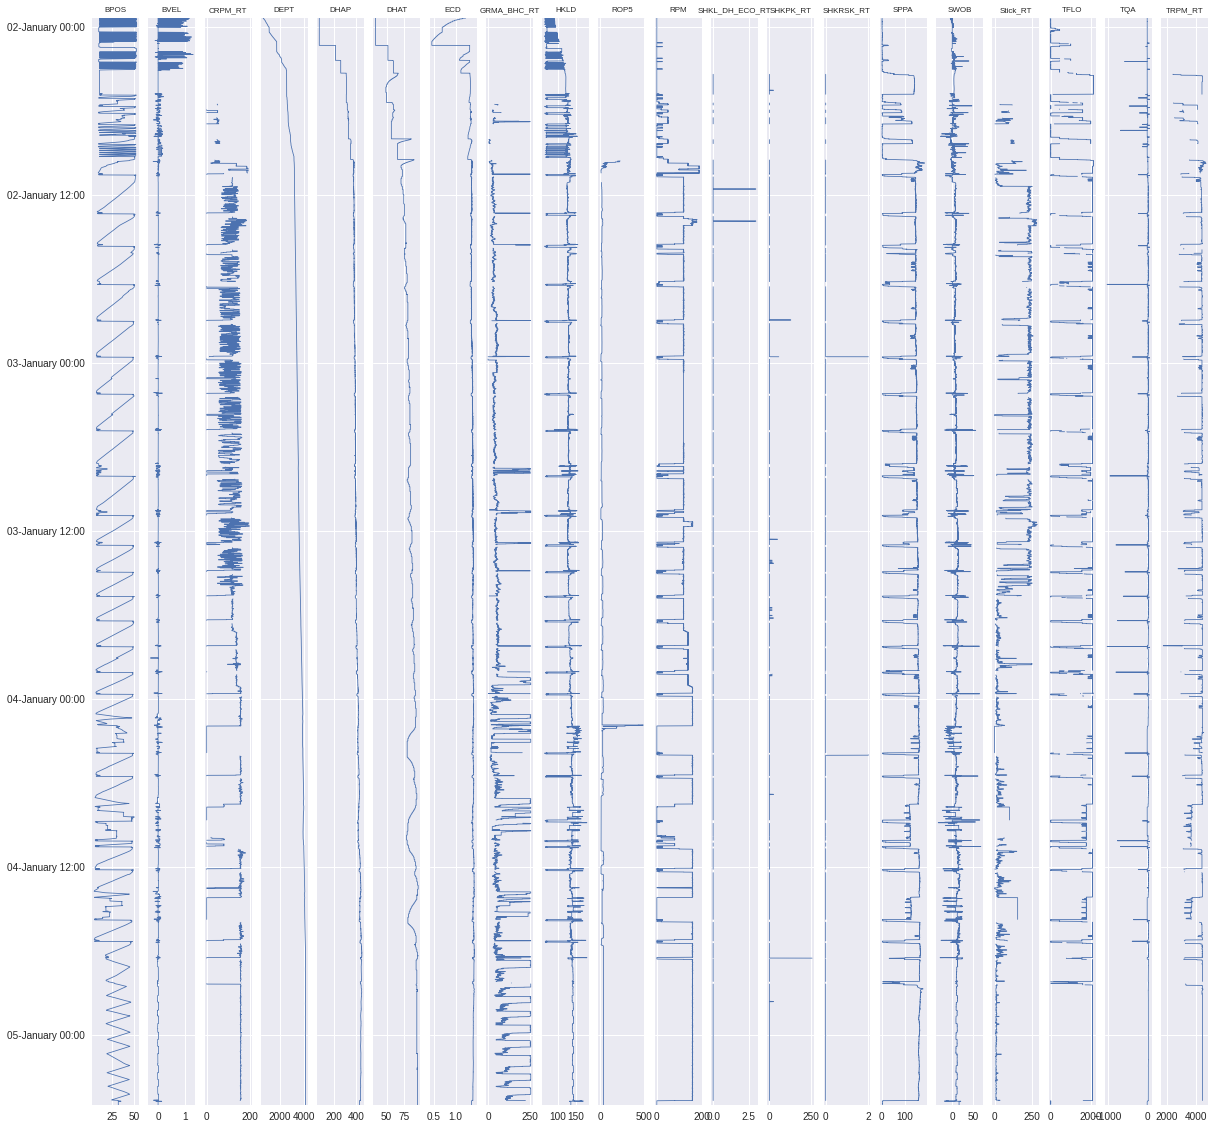

In [11]:
i = 0
for run in runs:
    sc.well_plt(run,info[i])
    i+=1

Plot: run_10 	Section: 8 1/2"


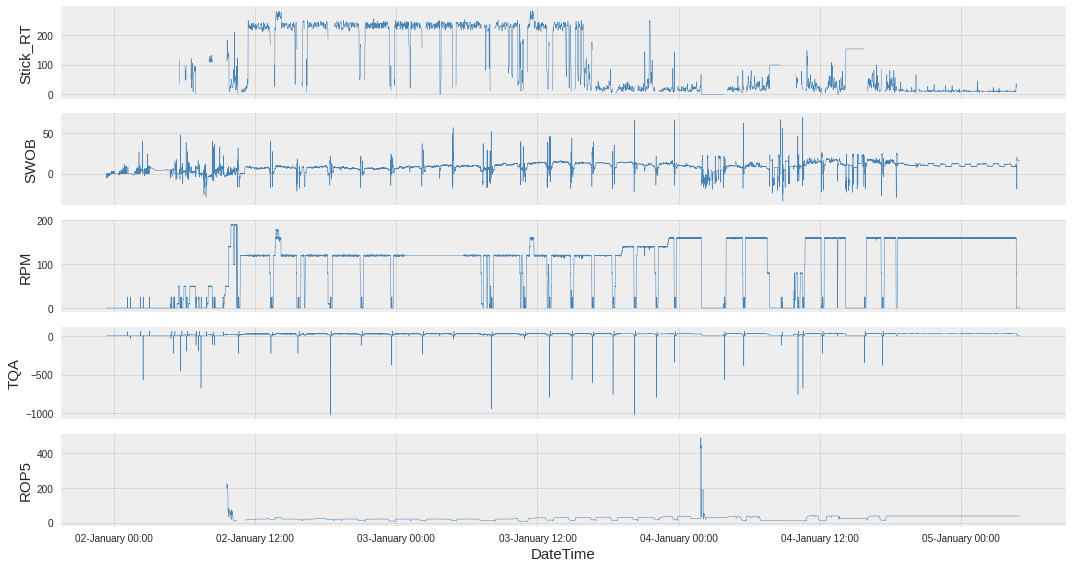

In [13]:
sc.time_plts(["Stick_RT","SWOB","RPM","TQA","ROP5"],runs[2],info[2])

## Date range selector

In [14]:
import ipywidgets as widgets
def print_date_range(date_range):
    global inf ;  inf = date_range[0]
    global sup ;  sup = date_range[1]
    return(inf,sup)   
def date_slider(data):
    dates = data.set_index("DateTime").index ; options = [(date.strftime('%d %m %H:%M'), date) for date in dates] ; index = (0, len(options)-1)
    selection_date_slider = widgets.SelectionRangeSlider(options=options,index=index,orientation='horizontal',layout={'width': '500px'},description="Date Selector")    
    widgets.interact(print_date_range,date_range=selection_date_slider)

In [15]:
date_slider(runs[2])

interactive(children=(SelectionRangeSlider(description='Date Selector', index=(0, 27953), layout=Layout(width=…

Plot: run_10 	Section: 8 1/2"


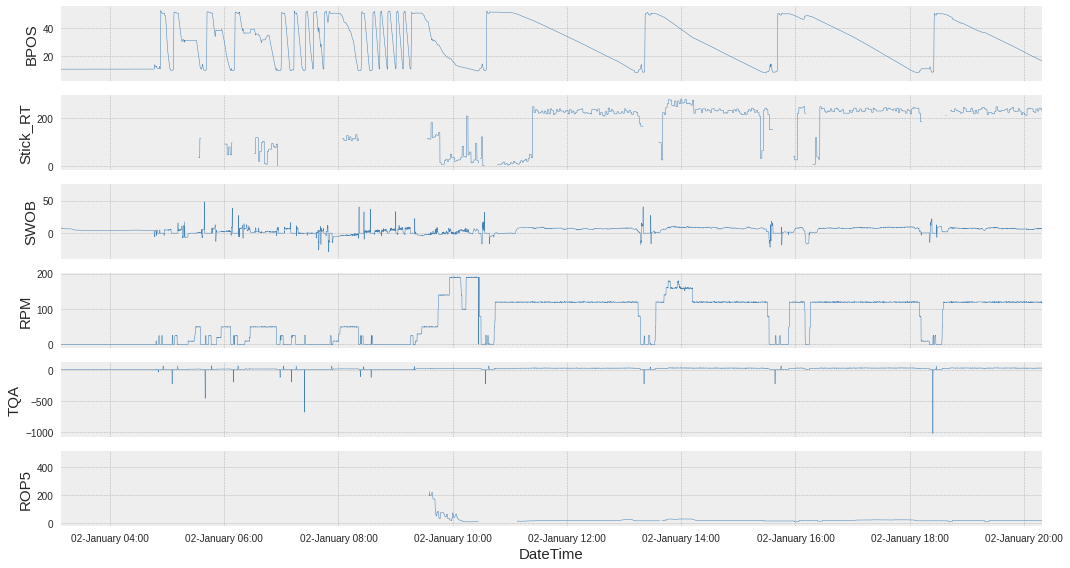

In [17]:
sc.date_plts(["BPOS","Stick_RT","SWOB","RPM","TQA","ROP5"],runs[2],info[2],inf,sup)

## Well identifier and section

In [18]:
i = 0 
for run in runs:
    run["Well"] = "F-15A"
    run["Run"] = runs_txt[i]
    i+=1

## Drilling Sections 

In [19]:
list(zip(info,files))

[(('run_7', '17 1/2"'), 'WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS'),
 (('run_9', '8 1/2"'), 'WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS'),
 (('run_10', '8 1/2"'), 'WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS')]

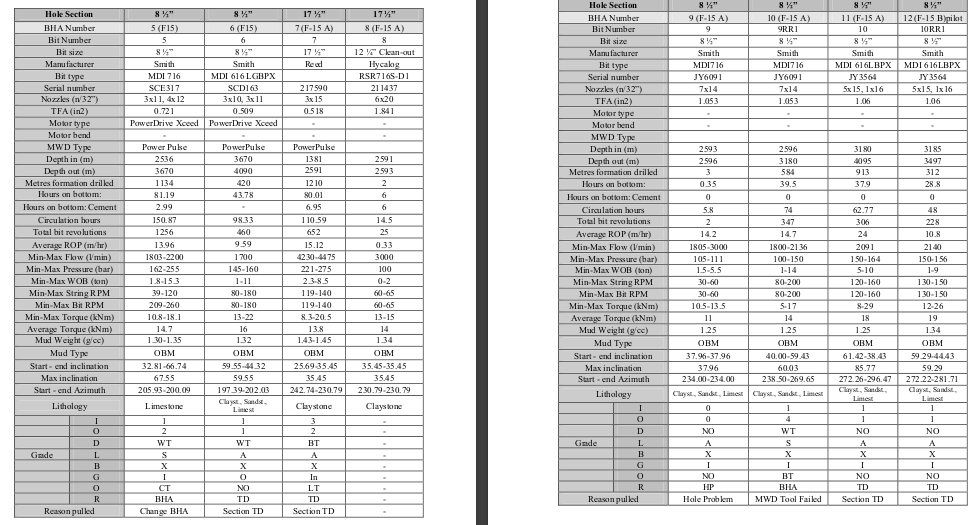

In [20]:
depths = [1381,2593,2596]


Plot: run_7 	Section: 17 1/2"


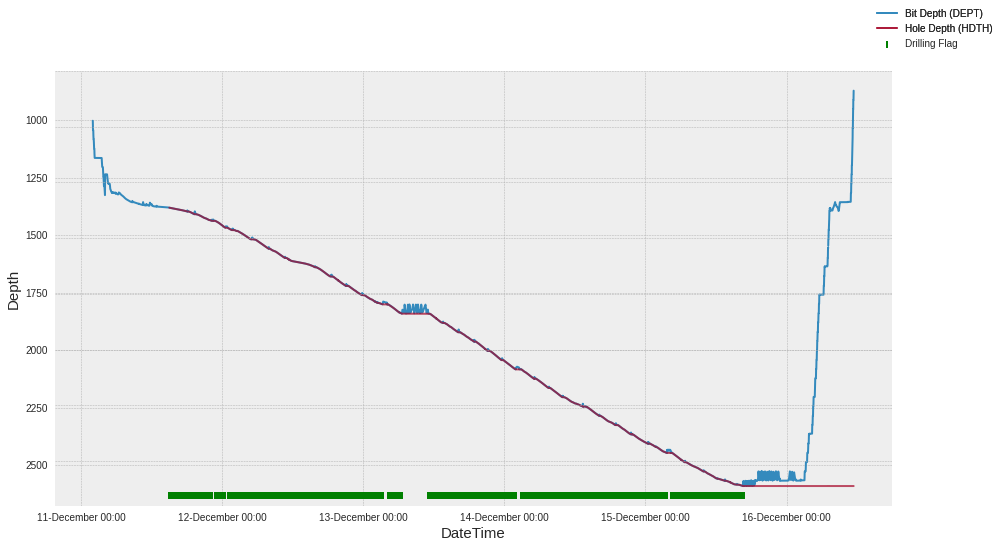


Plot: run_9 	Section: 8 1/2"


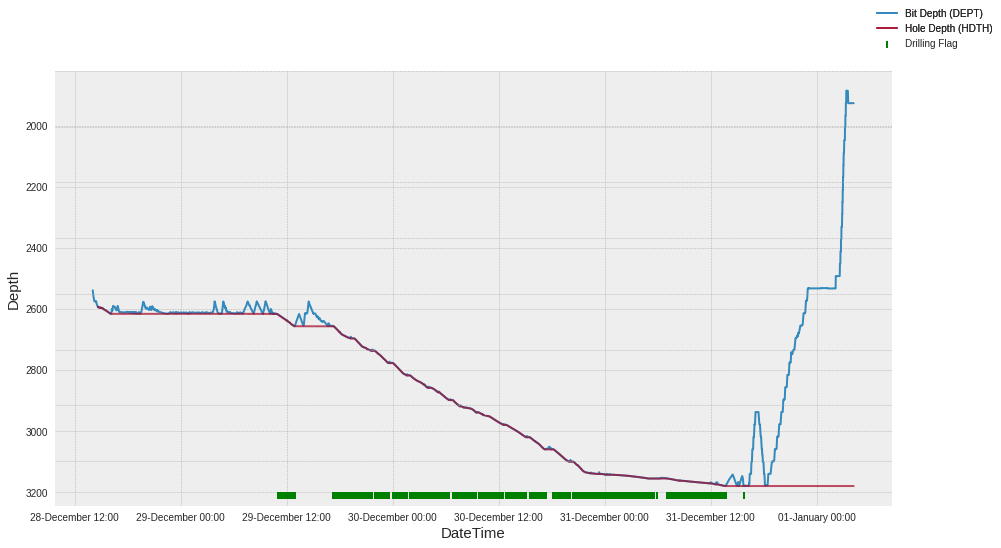


Plot: run_10 	Section: 8 1/2"


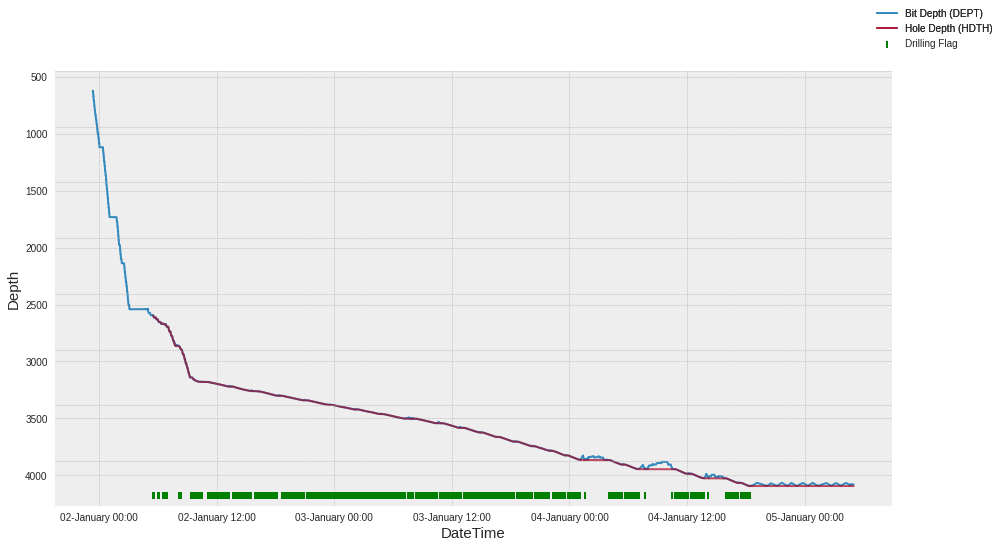

In [21]:
drill_op = []
i = 0
for run in runs:
    df = sc.drilling_process_fell(run,depths[i])
    sc.drill_flag(df,info[i])
    df = df[df["Flag"]==1]
    drill_op.append(df)
    i+=1    

## Drilling analysis

In [ ]:
runs[0].columns

In [ ]:
date_slider(drill_op[1])

In [ ]:
sc.date_scatter_plts(["DEPT","Stick_RT","SWOB","RPM","TQA","ROP5"],drill_op[1],info[1],inf,sup)

## `csv`files

In [22]:
info

[('run_7', '17 1/2"'), ('run_9', '8 1/2"'), ('run_10', '8 1/2"')]

In [23]:
filepath = "/home/luis/Desktop/Tesis/F15A/CSVs"

In [24]:
i = 8 
for file in drill_op:
    file.to_csv(filepath+"/run_"+str(i)+".csv",index=False)
    i+=1